# Week 1: Multiple Random Variables

**Course:** Statistics for Data Science II (BSST1002)  
**Week:** 1

## Learning Objectives
- Understand multiple random variables concepts
- Apply statistical methods to real data
- Implement using NumPy, SciPy, and Pandas
- Interpret results for data science


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

np.random.seed(42)
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

print('✓ Libraries loaded')

✓ Libraries loaded


## 1. Joint Distributions

### Definition
**Joint PMF** for discrete $(X, Y)$:
$$p(x, y) = P(X=x, Y=y)$$

**Properties:**
- $p(x, y) \geq 0$ for all $(x, y)$
- $\sum_x\sum_y p(x, y) = 1$

**Joint PDF** for continuous $(X, Y)$:
$$P((X,Y) \in A) = \iint_A f(x,y)\,dx\,dy$$


Joint PMF:
          X=0       X=1       X=2
Y=0  0.083333  0.166667  0.083333
Y=1  0.166667  0.250000  0.250000

✓ Sum = 1.00


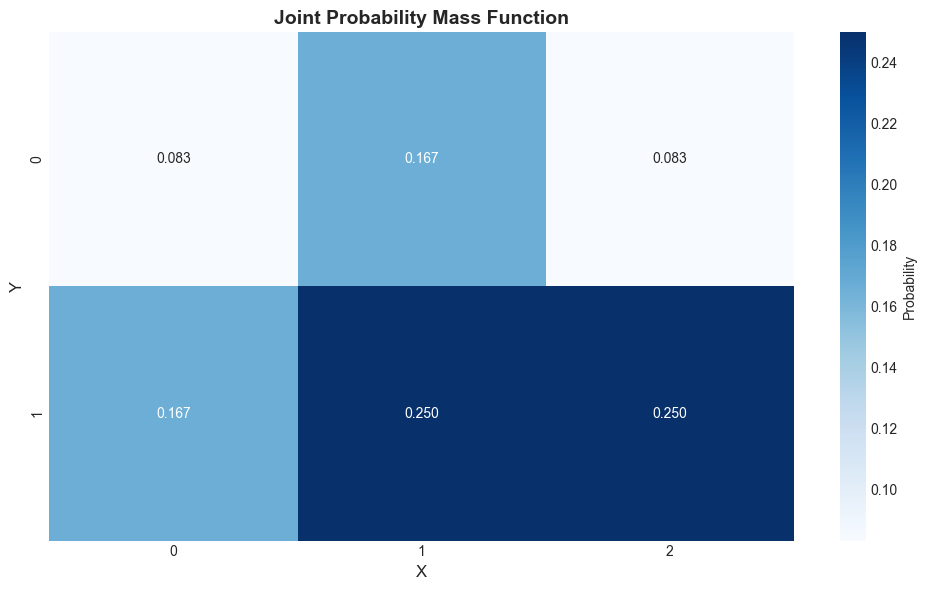

In [2]:
# Discrete joint distribution
x_vals = [0, 1, 2]
y_vals = [0, 1]

# Joint PMF (example: tossing two dice)
joint_pmf = np.array([[1/12, 2/12, 1/12],
                      [2/12, 3/12, 3/12]])

print('Joint PMF:')
print(pd.DataFrame(joint_pmf, index=[f'Y={y}' for y in y_vals], 
                   columns=[f'X={x}' for x in x_vals]))
print(f'\n✓ Sum = {joint_pmf.sum():.2f}')

# Visualize
plt.figure(figsize=(10, 6))
sns.heatmap(joint_pmf, annot=True, fmt='.3f', cmap='Blues',
            xticklabels=x_vals, yticklabels=y_vals, cbar_kws={'label': 'Probability'})
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Joint Probability Mass Function', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 2. Marginal Distributions

### Definition
**Marginal PMF of $X$:**
$$p_X(x) = \sum_y p(x, y)$$

**Marginal PMF of $Y$:**
$$p_Y(y) = \sum_x p(x, y)$$

Sum over the other variable!


Marginal Distribution of X:
  P(X=0) = 0.250
  P(X=1) = 0.417
  P(X=2) = 0.333

Marginal Distribution of Y:
  P(Y=0) = 0.333
  P(Y=1) = 0.667


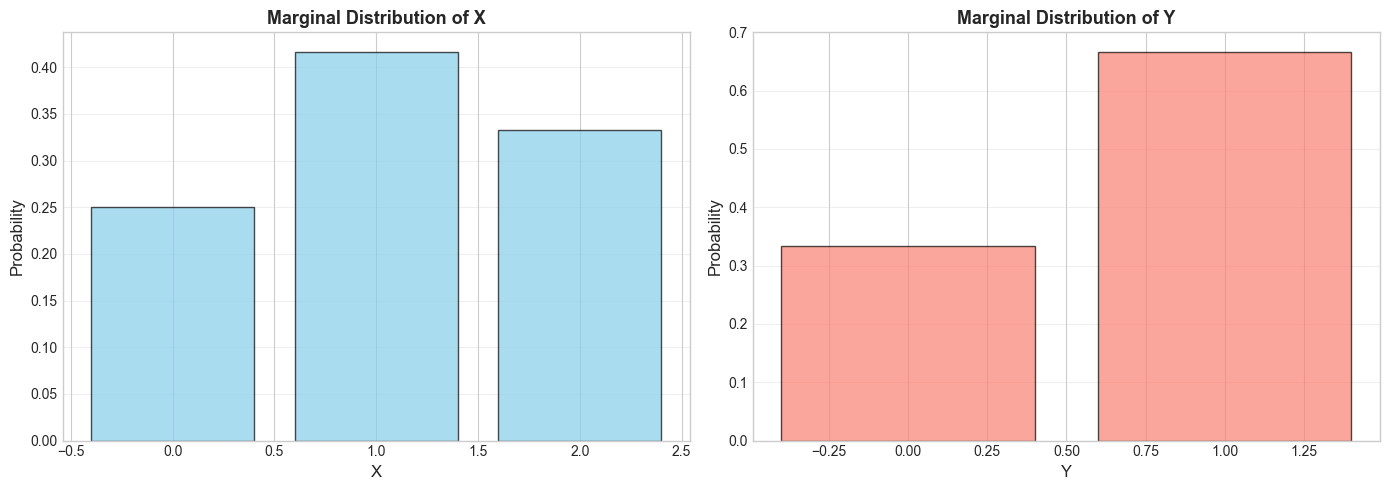

In [3]:
# Calculate marginal distributions
marginal_x = joint_pmf.sum(axis=0)
marginal_y = joint_pmf.sum(axis=1)

print('Marginal Distribution of X:')
for i, x in enumerate(x_vals):
    print(f'  P(X={x}) = {marginal_x[i]:.3f}')

print('\nMarginal Distribution of Y:')
for i, y in enumerate(y_vals):
    print(f'  P(Y={y}) = {marginal_y[i]:.3f}')

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(x_vals, marginal_x, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('X', fontsize=12)
axes[0].set_ylabel('Probability', fontsize=12)
axes[0].set_title('Marginal Distribution of X', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(y_vals, marginal_y, color='salmon', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Y', fontsize=12)
axes[1].set_ylabel('Probability', fontsize=12)
axes[1].set_title('Marginal Distribution of Y', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Conditional Distributions

### Definition
**Conditional PMF of $Y$ given $X=x$:**
$$p_{Y|X}(y|x) = \frac{p(x, y)}{p_X(x)}$$

Probability of $Y=y$ given we know $X=x$

**Properties:**
- $p_{Y|X}(y|x) \geq 0$
- $\sum_y p_{Y|X}(y|x) = 1$


Conditional Distribution of Y given X=1:
  P(Y=0|X=1) = 0.400
  P(Y=1|X=1) = 0.600

✓ Sum = 1.000


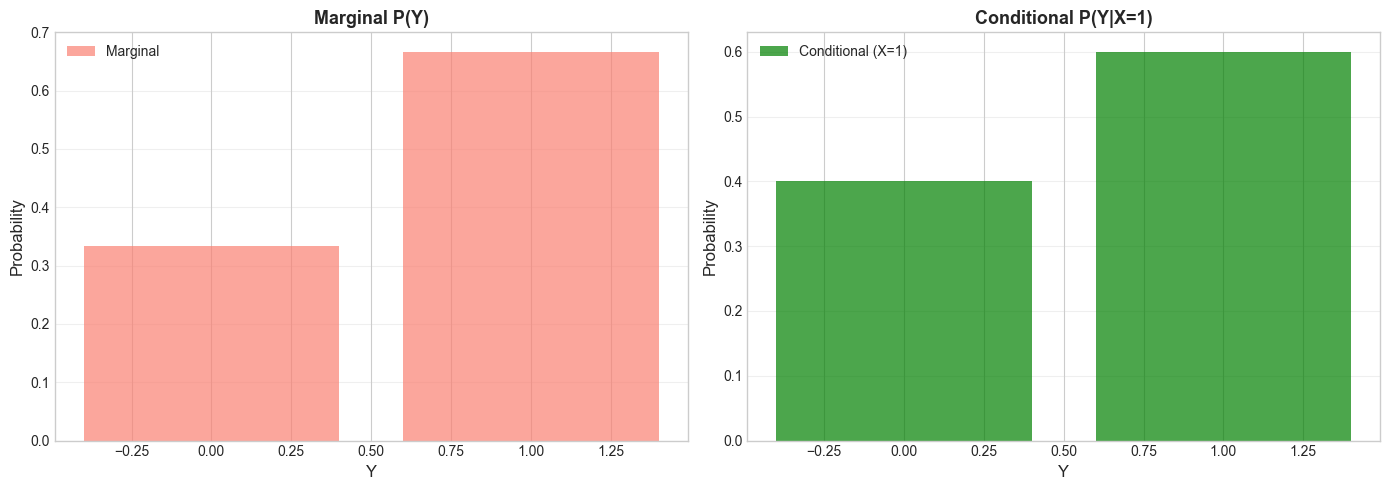

In [4]:
# Conditional distribution
x_given = 1  # Condition on X=1
idx = x_vals.index(x_given)

conditional_y_given_x = joint_pmf[:, idx] / marginal_x[idx]

print(f'Conditional Distribution of Y given X={x_given}:')
for i, y in enumerate(y_vals):
    print(f'  P(Y={y}|X={x_given}) = {conditional_y_given_x[i]:.3f}')
print(f'\n✓ Sum = {conditional_y_given_x.sum():.3f}')

# Compare with marginal
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(y_vals, marginal_y, color='salmon', alpha=0.7, label='Marginal')
axes[0].set_xlabel('Y', fontsize=12)
axes[0].set_ylabel('Probability', fontsize=12)
axes[0].set_title('Marginal P(Y)', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(y_vals, conditional_y_given_x, color='green', alpha=0.7, label=f'Conditional (X={x_given})')
axes[1].set_xlabel('Y', fontsize=12)
axes[1].set_ylabel('Probability', fontsize=12)
axes[1].set_title(f'Conditional P(Y|X={x_given})', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Continuous Joint Distributions

### Bivariate Normal
Most important continuous joint distribution:

$$(X, Y) \sim N(\mu_X, \mu_Y, \sigma_X^2, \sigma_Y^2, \rho)$$

where $\rho$ is correlation coefficient.

**PDF:**
$$f(x, y) = \frac{1}{2\pi\sigma_X\sigma_Y\sqrt{1-\rho^2}}\exp\left[-\frac{1}{2(1-\rho^2)}\left(\frac{(x-\mu_X)^2}{\sigma_X^2} - \frac{2\rho(x-\mu_X)(y-\mu_Y)}{\sigma_X\sigma_Y} + \frac{(y-\mu_Y)^2}{\sigma_Y^2}\right)\right]$$


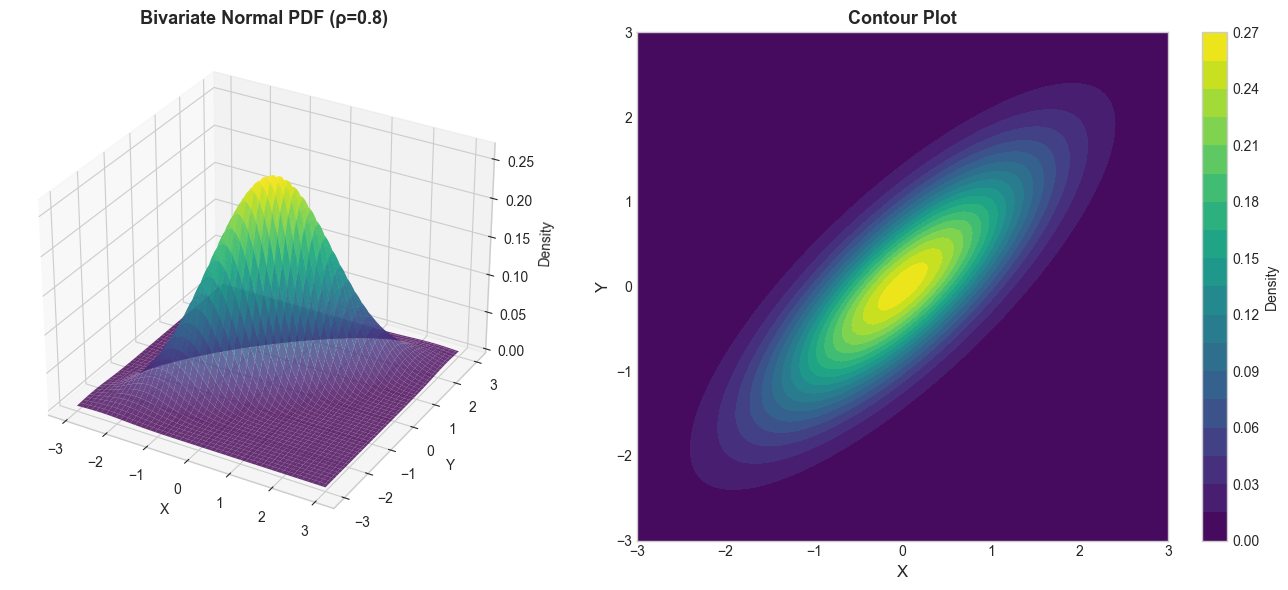

In [5]:
# Bivariate normal distribution
from scipy.stats import multivariate_normal

mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]  # Correlation = 0.8

rv = multivariate_normal(mean, cov)

# Generate grid
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
Z = rv.pdf(pos)

# 3D visualization
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_xlabel('X', fontsize=10)
ax1.set_ylabel('Y', fontsize=10)
ax1.set_zlabel('Density', fontsize=10)
ax1.set_title('Bivariate Normal PDF (ρ=0.8)', fontsize=13, fontweight='bold')

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, levels=20, cmap='viridis')
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Y', fontsize=12)
ax2.set_title('Contour Plot', fontsize=13, fontweight='bold')
plt.colorbar(contour, ax=ax2, label='Density')

plt.tight_layout()
plt.show()

## 5. Application: Stock Returns

Analyzing joint distribution of two stock returns


Summary Statistics:
Stock A: μ=0.00071, σ=0.01922
Stock B: μ=0.00101, σ=0.01699
Correlation: 0.711


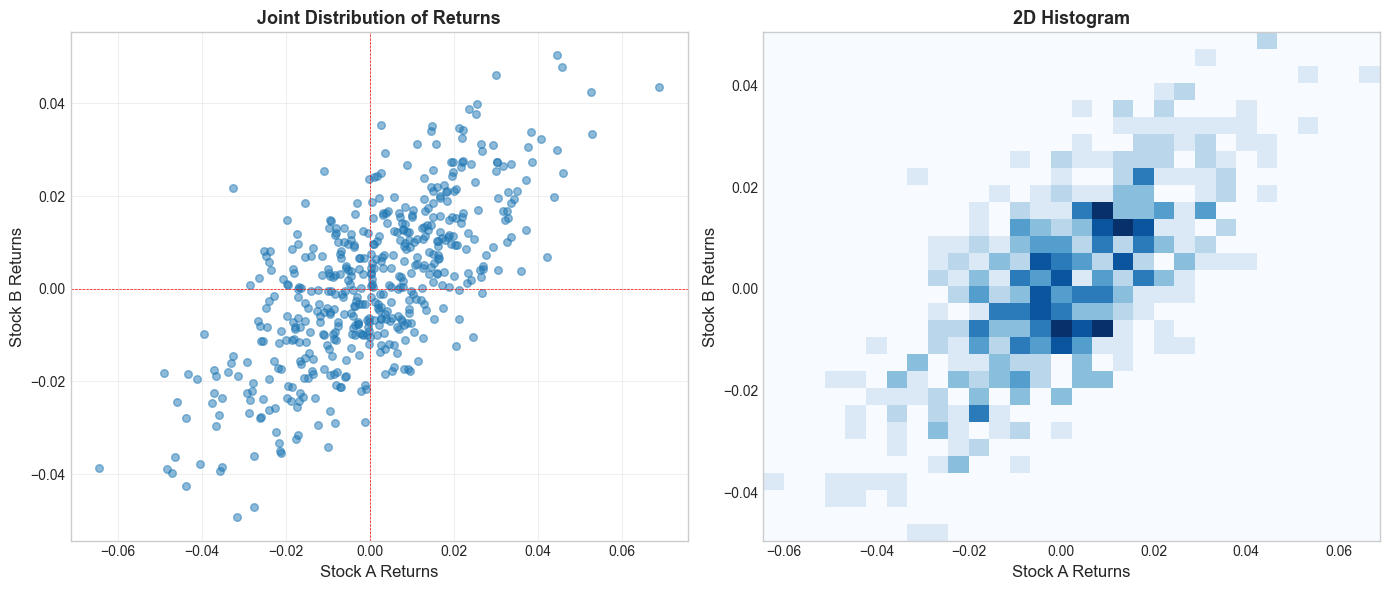

In [6]:
# Simulate stock returns
np.random.seed(42)
n_days = 500

# Correlated returns
mean = [0.001, 0.0008]
cov = [[0.0004, 0.00025], [0.00025, 0.0003]]
returns = np.random.multivariate_normal(mean, cov, n_days)

stock_A = returns[:, 0]
stock_B = returns[:, 1]

# Analysis
print('Summary Statistics:')
print(f'Stock A: μ={stock_A.mean():.5f}, σ={stock_A.std():.5f}')
print(f'Stock B: μ={stock_B.mean():.5f}, σ={stock_B.std():.5f}')
print(f'Correlation: {np.corrcoef(stock_A, stock_B)[0,1]:.3f}')

# Visualize joint distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot
axes[0].scatter(stock_A, stock_B, alpha=0.5, s=30)
axes[0].set_xlabel('Stock A Returns', fontsize=12)
axes[0].set_ylabel('Stock B Returns', fontsize=12)
axes[0].set_title('Joint Distribution of Returns', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(0, color='red', linestyle='--', linewidth=0.5)
axes[0].axvline(0, color='red', linestyle='--', linewidth=0.5)

# 2D histogram
axes[1].hist2d(stock_A, stock_B, bins=30, cmap='Blues')
axes[1].set_xlabel('Stock A Returns', fontsize=12)
axes[1].set_ylabel('Stock B Returns', fontsize=12)
axes[1].set_title('2D Histogram', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

## 11. Summary & Key Takeaways

### 📚 Core Concepts Covered
1. **Joint Distributions:** $p(x,y)$ or $f(x,y)$ - probability of two variables together
2. **Marginal Distributions:** Sum/integrate over other variable to get single-variable distribution
3. **Conditional Distributions:** $p(y|x) = p(x,y)/p_X(x)$ - distribution given knowledge of other variable
4. **Independence:** $p(x,y) = p_X(x) \cdot p_Y(y)$ - variables don't affect each other
5. **Covariance:** $\text{Cov}(X,Y) = E[XY] - E[X]E[Y]$ - measures linear association
6. **Correlation:** $\rho = \text{Cov}(X,Y)/(\sigma_X\sigma_Y)$ - normalized covariance

### 🔑 Key Formulas

**Marginals:**
$$p_X(x) = \sum_y p(x,y) \quad \text{or} \quad f_X(x) = \int f(x,y)\,dy$$

**Conditionals:**
$$p_{Y|X}(y|x) = \frac{p(x,y)}{p_X(x)}$$

**Independence:**
$$p(x,y) = p_X(x) \cdot p_Y(y) \iff \text{X and Y independent}$$

**Correlation:**
$$-1 \leq \rho_{X,Y} \leq 1$$

### ⚠️ Important Distinctions
- **Independence ⇒ Zero Covariance** ✅
- **Zero Covariance ⇏ Independence** ❌ (e.g., Y = X²)
- Correlation only measures **linear** relationships

### 🎯 Data Science Applications
- **Portfolio Analysis:** Joint distribution of stock returns
- **Feature Engineering:** Identifying correlated features
- **Regression:** Understanding predictor relationships
- **Dimensionality Reduction:** PCA uses covariance matrix
- **Anomaly Detection:** Multivariate outliers (Mahalanobis distance)

### 📖 Resources
- **Textbook:** "Introduction to Probability" - Bertsekas & Tsitsiklis (Chapter 3-4)
- **Python Libraries:** `scipy.stats.multivariate_normal`, `numpy.cov`, `pandas.corr()`
- **Visualization:** `seaborn.heatmap`, `seaborn.pairplot`, `seaborn.jointplot`

### 🚀 Next Week
**Week 2: Expectations, Variance, and Sampling Distributions**
- Law of Total Expectation
- Variance of sums
- Central Limit Theorem
- Sampling distributions

---

**🎓 End of Week 1**

## 6. Independence of Random Variables

### Definition
X and Y are **independent** if:
$$p(x, y) = p_X(x) \cdot p_Y(y)$$

**Key Property:** Independence ⇒ Zero Covariance (but not vice versa!)

### Testing Independence

In [ ]:
# Test independence
def test_independence(joint_pmf, marginal_x, marginal_y):
    """Check if P(X,Y) = P(X)*P(Y) for all values"""
    expected = np.outer(marginal_x, marginal_y)
    return np.allclose(joint_pmf, expected)

# Independent example: fair coin flips
joint_indep = np.array([[0.25, 0.25], [0.25, 0.25]])
marg_x = joint_indep.sum(axis=1)
marg_y = joint_indep.sum(axis=0)

print(f"Independent? {test_independence(joint_indep, marg_x, marg_y)}")

# Dependent example
joint_dep = np.array([[0.3, 0.2], [0.1, 0.4]])
marg_x_dep = joint_dep.sum(axis=1)
marg_y_dep = joint_dep.sum(axis=0)

print(f"Dependent? {not test_independence(joint_dep, marg_x_dep, marg_y_dep)}")

# Visualize both
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(joint_indep, annot=True, cmap='Greens', ax=axes[0], cbar=False)
axes[0].set_title('Independent Distribution', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Y')
axes[0].set_ylabel('X')

sns.heatmap(joint_dep, annot=True, cmap='Reds', ax=axes[1], cbar=False)
axes[1].set_title('Dependent Distribution', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Y')
axes[1].set_ylabel('X')

plt.tight_layout()
plt.show()

## 7. Covariance and Correlation

### Covariance
Measures how two variables vary together:
$$\text{Cov}(X, Y) = E[(X - E[X])(Y - E[Y])] = E[XY] - E[X]E[Y]$$

**Interpretation:**
- Cov > 0: Positive association
- Cov < 0: Negative association
- Cov = 0: Uncorrelated (but not necessarily independent!)

### Correlation
Normalized covariance (scale-invariant):
$$\rho_{X,Y} = \frac{\text{Cov}(X,Y)}{\sigma_X \sigma_Y}$$

**Range:** $-1 \leq \rho \leq 1$

In [ ]:
# Calculate covariance and correlation
np.random.seed(42)

# Example: study hours vs exam scores
study_hours = np.array([2, 3, 4, 5, 6, 7, 8])
exam_scores = np.array([65, 70, 75, 80, 85, 90, 95])

# Covariance
cov_matrix = np.cov(study_hours, exam_scores, bias=True)
covariance = cov_matrix[0, 1]

# Correlation
correlation = np.corrcoef(study_hours, exam_scores)[0, 1]

print(f"Covariance: {covariance:.2f}")
print(f"Correlation: {correlation:.4f}")
print(f"\nInterpretation: Strong positive relationship (ρ ≈ {correlation:.2f})")

# Visualize different correlations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Perfect positive (ρ = 1)
x1 = np.linspace(0, 10, 50)
y1 = 2 * x1 + 5
axes[0, 0].scatter(x1, y1, alpha=0.6, color='blue')
axes[0, 0].set_title(f'Perfect Positive (ρ = {np.corrcoef(x1, y1)[0,1]:.2f})', fontweight='bold')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Y')
axes[0, 0].grid(True, alpha=0.3)

# Strong positive (ρ ≈ 0.8)
x2 = np.random.normal(0, 1, 100)
y2 = 0.8 * x2 + np.random.normal(0, 0.6, 100)
axes[0, 1].scatter(x2, y2, alpha=0.6, color='green')
axes[0, 1].set_title(f'Strong Positive (ρ = {np.corrcoef(x2, y2)[0,1]:.2f})', fontweight='bold')
axes[0, 1].set_xlabel('X')
axes[0, 1].set_ylabel('Y')
axes[0, 1].grid(True, alpha=0.3)

# No correlation (ρ ≈ 0)
x3 = np.random.normal(0, 1, 100)
y3 = np.random.normal(0, 1, 100)
axes[1, 0].scatter(x3, y3, alpha=0.6, color='gray')
axes[1, 0].set_title(f'No Correlation (ρ = {np.corrcoef(x3, y3)[0,1]:.2f})', fontweight='bold')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('Y')
axes[1, 0].grid(True, alpha=0.3)

# Strong negative (ρ ≈ -0.9)
x4 = np.random.normal(0, 1, 100)
y4 = -0.9 * x4 + np.random.normal(0, 0.4, 100)
axes[1, 1].scatter(x4, y4, alpha=0.6, color='red')
axes[1, 1].set_title(f'Strong Negative (ρ = {np.corrcoef(x4, y4)[0,1]:.2f})', fontweight='bold')
axes[1, 1].set_xlabel('X')
axes[1, 1].set_ylabel('Y')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Important Example: Uncorrelated but Dependent

**Key Insight:** Zero correlation ≠ Independence!

Example: $Y = X^2$ where $X \sim \text{Uniform}(-2, 2)$
- Covariance = 0 (uncorrelated)
- But Y completely depends on X!

In [ ]:
# Y = X² relationship
np.random.seed(42)
X = np.random.uniform(-2, 2, 1000)
Y = X**2

# Check correlation
correlation = np.corrcoef(X, Y)[0, 1]
print(f"Correlation between X and Y=X²: {correlation:.4f}")
print(f"Interpretation: Nearly zero! But Y is completely determined by X")

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, Y, alpha=0.5, s=20)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y = X²', fontsize=12)
plt.title(f'Uncorrelated (ρ = {correlation:.3f}) but DEPENDENT', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)

# Show why: symmetry cancels linear relationship
plt.subplot(1, 2, 2)
plt.scatter(X, Y, c=np.sign(X), cmap='RdBu', alpha=0.6, s=20)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y = X²', fontsize=12)
plt.title('Positive X (red) and Negative X (blue) cancel out', fontsize=13, fontweight='bold')
plt.colorbar(label='Sign of X')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⚠️ Key Lesson: Always visualize data! Correlation only measures LINEAR relationships.")

## 9. Real Dataset Application: Feature Correlation Analysis

Let's analyze correlations in a real-world dataset scenario

In [ ]:
# Create realistic multivariate dataset
np.random.seed(42)
n = 200

# Simulate correlated features
df = pd.DataFrame({
    'height_cm': np.random.normal(170, 10, n),
    'age': np.random.randint(18, 65, n),
    'exercise_hrs': np.random.exponential(2, n)
})

# Add realistic correlations
df['weight_kg'] = 0.5 * df['height_cm'] + np.random.normal(0, 5, n)
df['income'] = 800 * df['age'] + np.random.normal(0, 10000, n)
df['bmi'] = df['weight_kg'] / (df['height_cm']/100)**2

# Correlation matrix
corr_matrix = df.corr()

print("📊 Correlation Matrix:")
print(corr_matrix.round(3))

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, linewidths=1,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify strong correlations
print("\n🔍 Strong Correlations (|ρ| > 0.5):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            print(f"  {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_val:.3f}")

## 10. Practice Problems

### Problem 1: Compute Marginals
Given joint PMF:
$$\begin{pmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{pmatrix}$$

Find $p_X(x)$ and $p_Y(y)$

### Problem 2: Test Independence
Are X and Y independent if:
$$p(x,y) = \begin{pmatrix} 0.15 & 0.35 \\ 0.15 & 0.35 \end{pmatrix}$$

### Problem 3: Correlation Calculation
If Cov(X,Y) = 10, Var(X) = 25, Var(Y) = 16, find ρ(X,Y)

In [ ]:
# Solutions to Practice Problems

print("="*60)
print("SOLUTIONS")
print("="*60)

# Problem 1: Marginals
print("\n📝 Problem 1: Marginals")
joint = np.array([[0.1, 0.2], [0.3, 0.4]])
marginal_X = joint.sum(axis=1)  # Sum over Y
marginal_Y = joint.sum(axis=0)  # Sum over X

print(f"p_X(0) = {marginal_X[0]}, p_X(1) = {marginal_X[1]}")
print(f"p_Y(0) = {marginal_Y[0]}, p_Y(1) = {marginal_Y[1]}")

# Problem 2: Independence
print("\n📝 Problem 2: Independence Test")
joint2 = np.array([[0.15, 0.35], [0.15, 0.35]])
marg_X = joint2.sum(axis=1)
marg_Y = joint2.sum(axis=0)
expected = np.outer(marg_X, marg_Y)

print(f"Joint PMF:\n{joint2}")
print(f"Expected if independent:\n{expected}")
print(f"Independent? {np.allclose(joint2, expected)}")

# Problem 3: Correlation
print("\n📝 Problem 3: Correlation")
cov_xy = 10
var_x = 25
var_y = 16
rho = cov_xy / (np.sqrt(var_x) * np.sqrt(var_y))
print(f"ρ(X,Y) = Cov(X,Y) / (σ_X × σ_Y)")
print(f"ρ(X,Y) = {cov_xy} / (√{var_x} × √{var_y})")
print(f"ρ(X,Y) = {cov_xy} / ({np.sqrt(var_x)} × {np.sqrt(var_y)})")
print(f"ρ(X,Y) = {rho:.3f}")

print("\n" + "="*60)